# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
#Load all required modules
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#Load mnist data into train and test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


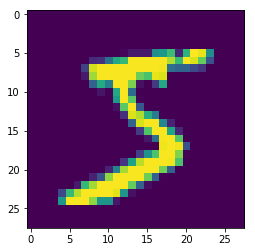

In [207]:
#print train datatset shape plot one image with matplotlib
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

#total train dataset has 60k images each of size 28*28

In [0]:
#reshaping the train and test data 
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [209]:
X_train.shape

(60000, 28, 28, 1)

In [210]:
#pixel values before normalising
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [0]:
#normalizing the pixel values to range within  0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [212]:
#pixel values after normalizing
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [213]:
#y labels has a range of labels from 0 -9 total 10 classes
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [215]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [216]:
#given model architecture 

from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [217]:
#provides model architecture information- input output shape,total parameters.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_228 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_229 (Conv2D)          (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_230 (Conv2D)          (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_40 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_40 (Activation)   (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compile model which is defined in previous step.


model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [219]:

#train or fit model to our train dataset.
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.2019 - acc: 0.9421
Epoch 2/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.0745 - acc: 0.9776
Epoch 3/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.0526 - acc: 0.9836
Epoch 4/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.0408 - acc: 0.9867
Epoch 5/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.0332 - acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.0259 - acc: 0.9918
Epoch 7/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.0207 - acc: 0.9929
Epoch 8/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.0160 - acc: 0.9947
Epoch 9/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.0146 - acc: 0.9955
Epoch 10/10
60000/60000 [==============================] - 15s 252us/step - loss: 

In [0]:

#calculate score or evaluate model for test dataset- which is not included in training.
score = model.evaluate(X_test, Y_test, verbose=0)

In [221]:
print(score)

[0.07671759347507978, 0.9836]


In [0]:
y_pred = model.predict(X_test)

In [223]:
#compare predicted value of model and actual value of test data.
print(y_pred[:9])
print("\n")
print(y_test[:9])

[[3.05105472e-20 1.26059141e-18 8.71992975e-15 7.74211060e-08
  7.88577370e-21 2.02974929e-15 2.82287103e-29 9.99999881e-01
  9.58769435e-12 9.35670378e-12]
 [1.43926425e-11 2.65163239e-12 1.00000000e+00 1.19437432e-10
  1.93505628e-24 6.44575198e-17 1.33063296e-10 2.29968650e-27
  2.81707464e-13 1.58789894e-19]
 [1.02118465e-08 9.99933243e-01 1.24122522e-07 1.24204994e-10
  2.23379448e-05 1.44993934e-10 4.60213534e-10 6.67897268e-07
  4.36133269e-05 2.15696216e-09]
 [1.00000000e+00 4.80402660e-22 7.21920135e-10 5.88246250e-17
  6.48965907e-20 3.26088237e-14 4.94658654e-11 1.82254004e-15
  9.66074483e-14 7.38513966e-15]
 [2.35781413e-14 2.88176015e-18 2.29288617e-14 1.97773243e-12
  9.99999762e-01 2.40913534e-16 7.19915748e-16 2.10156701e-11
  5.45482060e-09 2.32624060e-07]
 [2.32289014e-11 9.99987125e-01 3.58060381e-09 7.96920342e-12
  4.16633429e-06 1.02394534e-11 3.08109831e-12 6.45764158e-06
  2.22429412e-06 3.31421557e-09]
 [1.62187863e-21 1.31116071e-12 9.29008086e-12 1.02128340e

In [224]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

layer_dict

{'activation_40': <keras.layers.core.Activation at 0x7f312c7ccf60>,
 'conv2d_228': <keras.layers.convolutional.Conv2D at 0x7f3137e32f28>,
 'conv2d_229': <keras.layers.convolutional.Conv2D at 0x7f312c81cc88>,
 'conv2d_230': <keras.layers.convolutional.Conv2D at 0x7f312c7b98d0>,
 'flatten_40': <keras.layers.core.Flatten at 0x7f312c7d0208>}

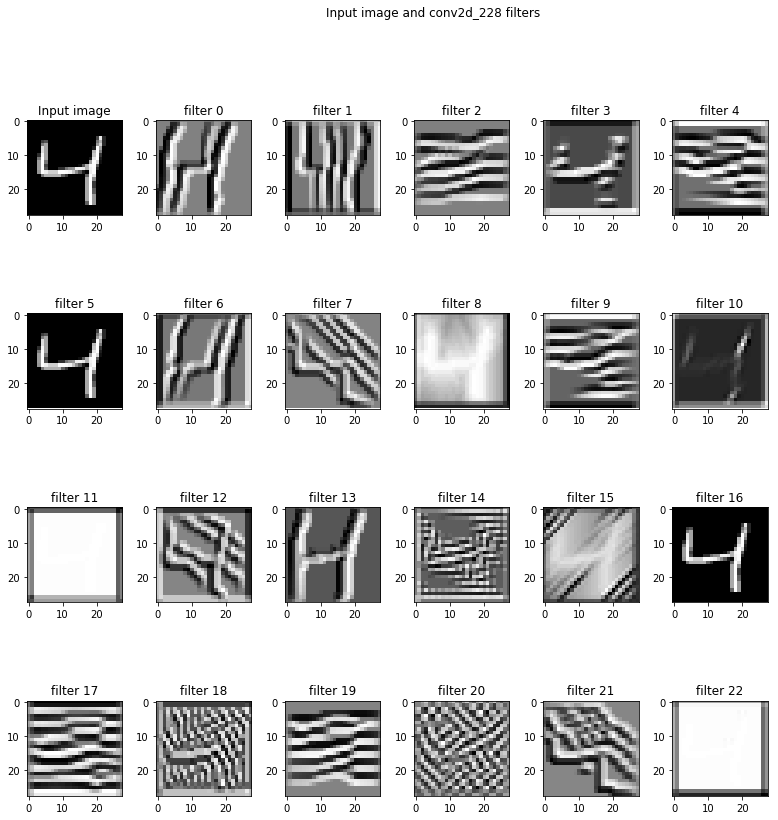

In [225]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_228'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

#Assignment 2 _session2

##CONSTRAINTS:-

define a new network such that:

1.   it has less than 20000 parameters
2.   it achieves validation accuracy of more than 99.4% (basically print(score) should be more than 0.994



##Experiment to design  Model which has less than 20000 parameters and accuracy 99.4%


Following instructions told tried different architecture to design model which involves structure:

--convl->convl->convl->Maxpool->convl->convl->convl-> flatten-> fully connected 

**Highest accuracy achieved is 99.05 %**


Tried using different  number of kernels, 1X1 convolution layer, and got below insights:-



1.   For mnist digit  classification - using 1X1 convolution layer achieves better accuracy.
2.   using large  kernel size (16, 32, 64)  at last layer improves accuracy as whole image itself is digit. It helps in seeing whole digits features if large kernel size is used. thats  why the demo code is achieving 98 % accuracy but number of parameters are more.

Improvements needed:-

1. large Number of kernel size(128, 256, 512) and large kernel size(5, 7) may improve accuracy but increases number of parameters.
1.   Increasing number of epochs may increase accuracy.






Note- every time model is run accuracy changes a bit.




###Experiment1
1.   Total params: 19,052
1.   Trainable params: 19,052
2.  Non-trainable params: 0


 **Accuracy : 98.49 %**

[0.050116387882188425, 0.9849]


Each convolution layer with  64,, 32  (3X3) kernel followed by10 ( 1X1)  convolution layer with one maxpooling layer and last dense layer with kernel size of 12 








In [166]:
#given model architecture 
#rp- receptive field, channel size-cs

from keras.layers import Activation
model2 = Sequential()

 
model2.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1))) #rp-3 , cs-26X26X64
model2.add(Convolution2D(10, 1, activation='relu'))#3, 26x26x10

model2.add(Convolution2D(32, 3,3, activation='relu'))#5, 24x24x32

model2.add(Convolution2D(10, 1,1, activation='relu'))#5, 24x24x10

model2.add(MaxPooling2D(pool_size=(2,2)))#10 , 12x12x10

model2.add(Convolution2D(10, 1,1, activation='relu'))#10, 12X12X10


model2.add(Convolution2D(10, 12))#28, 1X1X10



model2.add(Flatten()) 
model2.add(Activation('softmax'))





#provides model architecture information- input output shape,total parameters.
model2.summary()

#compile model which is defined in previous step.
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


#train or fit model to our train dataset.
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)



#calculate score or evaluate model for test dataset- which is not included in training.
score = model2.evaluate(X_test, Y_test, verbose=0)

print(score)


y_pred = model2.predict(X_test)

#compare predicted value of model and actual value of test data.
print(y_pred[:9])
print("\n")
print(y_test[:9])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_148 (Conv2D)          (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 26, 26, 10)        650       
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 24, 24, 32)        2912      
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 24, 24, 10)        330       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 12, 12, 10)        110       
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 1, 1, 10)          14410     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/10
60000/60000 [==============================] - 24s 395us/step - loss: 0.1904 - acc: 0.9415
Epoch 2/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.0722 - acc: 0.9785
Epoch 3/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.0573 - acc: 0.9825
Epoch 4/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.0478 - acc: 0.9850
Epoch 5/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.0416 - acc: 0.9867
Epoch 6/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.0349 - acc: 0.9887
Epoch 7/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.0319 - acc: 0.9900
Epoch 8/10
60000/60000 [==============================] - 21s 350us/step - loss: 0.0280 - acc: 0.9914
Epoch 9/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.0255 - acc: 0.9917
Epoch 10/10
60000/60000 [==============================] - 21s 351us/step - loss: 

###Experiment2

Total params: 19,532


Trainable params: 19,532


Non-trainable params: 0

**Accuracy- 98.79 %**

[0.05057578535213542, 0.9879] 


used 16 number of kernels for each 3X3 kernel convolution layer. used same design as experiment1 but added 10(1X1 ) convolutional after maxpooling Increased accuracy



In [165]:
from keras.layers import Activation
model2 = Sequential()

 
model2.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #rp-3 , cs-26X26X16
model2.add(Convolution2D(10, 1, activation='relu'))#3, 26X26X10

model2.add(Convolution2D(16, 3,3, activation='relu'))#5, 24X24X16

model2.add(Convolution2D(10, 1,1, activation='relu'))#5, 24X24X10

model2.add(MaxPooling2D(pool_size=(2,2)))#10 , 12X12X10

model2.add(Convolution2D(10, 1,1, activation='relu'))#10, 12X12X10

model2.add(Convolution2D(16, 3,3, activation='relu'))#12, 10X10X16


model2.add(Convolution2D(10, 10))#28, 1X1X10



model2.add(Flatten()) 
model2.add(Activation('softmax'))





#provides model architecture information- input output shape,total parameters.
model2.summary()

#compile model which is defined in previous step.
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


#train or fit model to our train dataset.
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)



#calculate score or evaluate model for test dataset- which is not included in training.
score = model2.evaluate(X_test, Y_test, verbose=0)

print("\n","score:-",score,"\n")


y_pred = model2.predict(X_test)

#compare predicted value of model and actual value of test data.
print(y_pred[:9])
print("\n")
print(y_test[:9])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-pac

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_141 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 26, 26, 10)        170       
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 24, 24, 16)        1456      
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 24, 24, 10)        170       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 12, 12, 10)        110       
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 10, 10, 16)        1456      
__________

###Eperiment3

Total params: 18,412


Trainable params: 18,412


Non-trainable params: 0

**Accuracy - 98.5 %**
score:- [0.05180799219533437, 0.9855] 

used 32 number of kernels for 3X3 kernelsize accuracy decreased liitle bit.

In [168]:
from keras.layers import Activation

model2 = Sequential()

 
model2.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #rp-3 , cs-26X26X32
model2.add(Convolution2D(10, 1, activation='relu'))#3, 26X26X10

model2.add(Convolution2D(32, 3,3, activation='relu'))#5, 24X24X32

model2.add(Convolution2D(10, 1,1, activation='relu'))#5, 24X24X10

model2.add(MaxPooling2D(pool_size=(2,2)))#10 , 12X12X10

model2.add(Convolution2D(10, 1,1, activation='relu'))#10, 12X12X10




model2.add(Convolution2D(10, 12))#28, 1X1X10



model2.add(Flatten()) 
model2.add(Activation('softmax'))





#provides model architecture information- input output shape,total parameters.
model2.summary()

#compile model which is defined in previous step.
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


#train or fit model to our train dataset.
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)



#calculate score or evaluate model for test dataset- which is not included in training.
score = model2.evaluate(X_test, Y_test, verbose=0)

print("\n","score:-",score,"\n")


y_pred = model2.predict(X_test)

#compare predicted value of model and actual value of test data.
print(y_pred[:9])
print("\n")
print(y_test[:9])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_154 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 24, 24, 32)        2912      
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 24, 24, 10)        330       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 12, 12, 10)        110       
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 1, 1, 10)          14410     
__________

###Experiment4

Total params: 17,218

Trainable params: 17,218

Non-trainable params: 0

**Accuracy  99.05%**

score:- [0.03604102025316315, 0.9905] 

used 3 conv-> maxpool->3 convl with increasing number of kernels (8, 16, 32) and no 1X1 conv layer. accuracy increased to 99%

In [202]:
from keras.layers import Activation

model2 = Sequential()

 
model2.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) #3, 26X26X8
model2.add(Convolution2D(16, 3,3, activation='relu'))# 5, 24X24X16
model2.add(Convolution2D(32, 3,3, activation='relu'))#7,  22X22X32


model2.add(MaxPooling2D(pool_size=(2,2)))#14,  11X11X32

model2.add(Convolution2D(8, 3,3, activation='relu'))#16,  9X9X8
model2.add(Convolution2D(16, 3,3, activation='relu'))#18 7X7X16
model2.add(Convolution2D(10, 7 ))#28,  1X1X32



model2.add(Flatten()) 
model2.add(Activation('softmax'))





#provides model architecture information- input output shape,total parameters.
model2.summary()

#compile model which is defined in previous step.
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


#train or fit model to our train dataset.
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)



#calculate score or evaluate model for test dataset- which is not included in training.
score = model2.evaluate(X_test, Y_test, verbose=0)

print("\n","score:-",score,"\n")


y_pred = model2.predict(X_test)

#compare predicted value of model and actual value of test data.
print(y_pred[:9])
print("\n")
print(y_test[:9])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has bee

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_216 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 9, 9, 8)           2312      
_________________________________________________________________
conv2d_220 (Conv2D)          (None, 7, 7, 16)          1168      
_________________________________________________________________
conv2d_221 (Conv2D)          (None, 1, 1, 10)          7850      
__________

###Experiment5

Total params: 18,382

Trainable params: 18,382

Non-trainable params: 0

**Accuracy - 99.05 %**
score:- [0.037659333861383495, 0.9905] 

added 1X1 convl  layer  and used (16, 32 number of kernels)  not much difference in accuracy.


In [203]:
from keras.layers import Activation

model2 = Sequential()

 
model2.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #3, 26X26X16
model2.add(Convolution2D(32, 3,3, activation='relu'))#5,  24X24X32
model2.add(Convolution2D(10, 1,1, activation='relu'))#5,  24X24X10


model2.add(MaxPooling2D(pool_size=(2,2)))#10,  12X12X10

model2.add(Convolution2D(32, 3,3, activation='relu'))#12,  10X10X32
model2.add(Convolution2D(10, 1,1, activation='relu'))#12,  10X10X10
model2.add(Convolution2D(10, 10,10 ))#28,  1X1X10



model2.add(Flatten()) 
model2.add(Activation('softmax'))





#provides model architecture information- input output shape,total parameters.
model2.summary()

#compile model which is defined in previous step.
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


#train or fit model to our train dataset.
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)



#calculate score or evaluate model for test dataset- which is not included in training.
score = model2.evaluate(X_test, Y_test, verbose=0)

print("\n","score:-",score,"\n")


y_pred = model2.predict(X_test)

#compare predicted value of model and actual value of test data.
print(y_pred[:9])
print("\n")
print(y_test[:9])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_222 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_223 (Conv2D)          (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_224 (Conv2D)          (None, 24, 24, 10)        330       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_225 (Conv2D)          (None, 10, 10, 32)        2912      
_________________________________________________________________
conv2d_226 (Conv2D)          (None, 10, 10, 10)        330       
_________________________________________________________________
conv2d_227 (Conv2D)          (None, 1, 1, 10)          10010     
__________

###Experiment6

Total params: 42,228

Trainable params: 42,228

Non-trainable params: 0

**Accuracy : 98.95 %**  

score:- [0.036342939333917273, 0.9895] 

In [201]:
from keras.layers import Activation

model2 = Sequential()

 
model2.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #3, 26X26X16
model2.add(Convolution2D(10, 1,1, activation='relu'))#3, 26X26X10
model2.add(Convolution2D(32, 3,3, activation='relu'))#5,  24X24X32


model2.add(MaxPooling2D(pool_size=(2,2)))#10,  12X12X32

model2.add(Convolution2D(32, 3,3, activation='relu'))#12, 10X10X32

model2.add(Convolution2D(32, 3,3, activation='relu'))#14, 8X8X32
model2.add(Convolution2D(10, 8 ))#28, 1X1X10



model2.add(Flatten()) 
model2.add(Activation('softmax'))





#provides model architecture information- input output shape,total parameters.
model2.summary()

#compile model which is defined in previous step.
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


#train or fit model to our train dataset.
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)



#calculate score or evaluate model for test dataset- which is not included in training.
score = model2.evaluate(X_test, Y_test, verbose=0)

print("\n","score:-",score,"\n")


y_pred = model2.predict(X_test)

#compare predicted value of model and actual value of test data.
print(y_pred[:9])
print("\n")
print(y_test[:9])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_210 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_211 (Conv2D)          (None, 26, 26, 10)        170       
_________________________________________________________________
conv2d_212 (Conv2D)          (None, 24, 24, 32)        2912      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_213 (Conv2D)          (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_214 (Conv2D)          (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_215 (Conv2D)          (None, 1, 1, 10)          20490     
__________

###Experiment7


*  Total params: 38,814

*  Trainable params: 38,814

*  Non-trainable params: 0

****Accuracy score is 98.85% ****

[0.05012940304659878, 0.9885]







In [37]:
#given model architecture 
#rp- receptive field, channel size-cs

from keras.layers import Activation
model1 = Sequential()

 
model1.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #rp-3 , cs-26X26X32
model1.add(Convolution2D(10, 1, activation='relu'))#3, 26X26X10

model1.add(Convolution2D(32, 3,3, activation='relu'))#5, 24X24X32

model1.add(MaxPooling2D(pool_size=(2,2)))#5, 12X12X32

model1.add(Convolution2D(10, 1,1, activation='relu'))#10, 12X12X10

model1.add(Convolution2D(32, 3,3, activation='relu'))#12, 10X10X32


model1.add(Convolution2D(10, 10))#28, 1X1X10



model1.add(Flatten()) 
model1.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
W0816 06:59:47.202515 139814578218880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app

In [38]:
#provides model architecture information- input output shape,total parameters.
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 24, 24, 32)        2912      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 12, 12, 10)        330       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 32)        2912      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 1, 1, 10)          32010     
__________

In [0]:
#compile model which is defined in previous step.
model1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [40]:

#train or fit model to our train dataset.
model1.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.1493 - acc: 0.9547
Epoch 2/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0484 - acc: 0.9853
Epoch 3/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0344 - acc: 0.9890
Epoch 4/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0252 - acc: 0.9920
Epoch 5/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0208 - acc: 0.9929
Epoch 6/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0155 - acc: 0.9947
Epoch 7/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0131 - acc: 0.9956
Epoch 8/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0110 - acc: 0.9963
Epoch 9/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0086 - acc: 0.9973
Epoch 10/10
60000/60000 [==============================] - 10s 168us/step - loss: 

In [0]:
#calculate score or evaluate model for test dataset- which is not included in training.
score = model1.evaluate(X_test, Y_test, verbose=0)

In [43]:
print(score)

[0.05012940304659878, 0.9885]


In [0]:
y_pred = model.predict(X_test)

In [45]:
#compare predicted value of model and actual value of test data.
print(y_pred[:9])
print("\n")
print(y_test[:9])

[[0.10493474 0.10161652 0.0954626  0.10033016 0.10162459 0.09758297
  0.10224651 0.09449761 0.10311491 0.0985894 ]
 [0.09773988 0.09438017 0.09649892 0.10334422 0.09998719 0.10401086
  0.10180815 0.10126363 0.09922975 0.10173725]
 [0.10311636 0.10550562 0.09732316 0.10152198 0.09591486 0.1001429
  0.09637088 0.09977473 0.10396071 0.09636884]
 [0.10557345 0.09860246 0.09388263 0.10887089 0.08811744 0.10318051
  0.09971385 0.09575008 0.10097131 0.10533746]
 [0.10115144 0.11407564 0.09346947 0.10007957 0.09665465 0.09803565
  0.0990995  0.09858677 0.09917868 0.0996686 ]
 [0.1032745  0.10722182 0.09790049 0.10100112 0.09795441 0.09907487
  0.09647804 0.09715941 0.10599656 0.09393874]
 [0.09980239 0.1037842  0.09979733 0.1045879  0.10284805 0.10005597
  0.09589493 0.09179944 0.10186139 0.09956834]
 [0.10587639 0.10283493 0.09797458 0.09868401 0.09520015 0.10066752
  0.10272906 0.09694833 0.09672572 0.10235931]
 [0.09691148 0.114339   0.0964378  0.09850784 0.10260563 0.10011236
  0.09351663 

###Queries
bit confused about calculating global receptive field when maxpooling and large kernel size is used. kindly let me know if i have written GRF wrongly next to each layer in comment.

***I am not able to get 99.4% accuracy. max accuracy got was 99.05%.  tried different architectures and submitted  few models which gave good accuracy. using relu activation in last layer before flattening layer will drastically reduce accuracy to 38 % , 65 % with same model if i remove relu activation function for conv layer before flaten layer accuracy will go above 97 % with no change in any other layers.***